In [74]:
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
from pycaret.utils import version
version()
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import itertools

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

'2.2.1'

In [5]:
pip install pycaret-nightly

  Using cached pycaret_nightly-2.2.1.dev1606091343-py3-none-any.whl (249 kB)



In [2]:
pip install --upgrade pycaret

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 2.1.2
    Uninstalling pycaret-2.1.2:
      Successfully uninstalled pycaret-2.1.2
Note: you may need to restart the kernel to use updated packages.


In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [7]:
pip install pandas_ml

Note: you may need to restart the kernel to use updated packages.


Load training/testing data with Test prediction


In [3]:
cineplex_train = pd.read_csv("D:\\869-Machine Learning & AI\\Team project\\gen_X_train_features_v3_leakage_noFilmID.csv")
cineplex_train.head(5)

,Visit_TimeSlice_ID,Location_ID,Auditorium_Experience_ID,Seating_Experience_ID,Sales_Channel_ID,Performance_Experience_ID,Performance_Type_ID,Film_Runtime,Is_IMAX,Is_DBOX_Capable,...,Province_CD_MB,Province_CD_NB,Province_CD_NL,Province_CD_NS,Province_CD_ON,Province_CD_PE,Province_CD_QC,Province_CD_SK,Country_CD_CA,Has_US_Is_LrgPopcorn
0,15,7123,0,0,8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,27,9203,1,1,8,1,1,104,0,0,...,0,0,0,0,0,0,1,0,1,0
2,16,7415,1,1,8,1,1,116,0,0,...,0,0,0,0,1,0,0,0,1,1
3,23,3150,1,1,8,1,1,117,0,1,...,0,0,0,0,0,0,0,0,1,0
4,37,1405,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
cineplex_test = pd.read_csv("D:\\869-Machine Learning & AI\\Team project\\gen_X_test_features_v3_noFilmID.csv")
cineplex_test.head(5)

,Visit_TimeSlice_ID,Location_ID,Auditorium_Experience_ID,Film_ID,Seating_Experience_ID,Sales_Channel_ID,Performance_Experience_ID,Performance_Type_ID,Film_Runtime,Is_IMAX,...,Province_CD_BC,Province_CD_MB,Province_CD_NB,Province_CD_NL,Province_CD_NS,Province_CD_ON,Province_CD_PE,Province_CD_QC,Province_CD_SK,Country_CD_CA
0,30,3143,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16,9188,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,22,7260,1,29558,4,8,1,1,97,0,...,0,0,0,0,0,1,0,0,0,1
3,32,7413,1,29562,1,8,1,1,122,0,...,0,0,0,0,0,1,0,0,0,1
4,29,3150,1,28116,4,8,1,1,128,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
cineplex_test_pred = pd.read_csv("D:\\869-Machine Learning & AI\\Team project\\gen_y_test_v3.csv")
cineplex_test_pred.head(5)

,Has_US_Is_LrgPopcorn
0,1
1,0
2,0
3,0
4,0


In [6]:
print('Data for Modeling: ' + str(cineplex_train.shape))
print('Unseen Data For Predictions ' + str(cineplex_test.shape))



Data for Modeling: (881, 177)
Unseen Data For Predictions (164, 178)


Initialize data setup 

In [7]:
from pycaret.classification import *
reg_cineplex = setup(data=cineplex_train,session_id=123,
            target = 'Has_US_Is_LrgPopcorn', remove_multicollinearity=True, multicollinearity_threshold = 0.6,
            normalize=True,normalize_method = 'zscore',transformation=True, handle_unknown_categorical = True,
             unknown_categorical_method = 'least_frequent', 
             combine_rare_levels = True, rare_level_threshold = 0.10, ignore_low_variance = True,
             remove_perfect_collinearity = True, group_features = None, group_names = None, 
             feature_selection = True, feature_selection_threshold = 0.5, feature_interaction = True, feature_ratio = True, 
             fix_imbalance = True, data_split_shuffle = True, 
             log_experiment = True, log_plots = True, log_profile = True, log_data = True, 
             experiment_name='cineplex11')


,Description,Value
0,session_id,123
1,Target,Has_US_Is_LrgPopcorn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(881, 177)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,152
8,Ordinal Features,False
9,High Cardinality Features,False


Compare Baseline

In [8]:
top5 = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8650,0.9284,0.7929,0.8321,0.8098,0.7055,0.7082,0.2220
catboost,CatBoost Classifier,0.8602,0.9343,0.8150,0.8026,0.8074,0.6978,0.6993,12.6960
et,Extra Trees Classifier,0.8553,0.9318,0.7968,0.8044,0.7988,0.6860,0.6879,0.0600
rf,Random Forest Classifier,0.8505,0.9310,0.8057,0.7905,0.7942,0.6774,0.6816,0.0820
xgboost,Extreme Gradient Boosting,0.8504,0.9312,0.7883,0.7959,0.7910,0.6746,0.6758,0.5010
ada,Ada Boost Classifier,0.8425,0.9175,0.8022,0.7807,0.7867,0.6626,0.6674,0.0840
nb,Naive Bayes,0.8424,0.8885,0.8555,0.7464,0.7957,0.6685,0.6747,0.0280
lr,Logistic Regression,0.8392,0.9081,0.7931,0.7722,0.7803,0.6538,0.6564,0.2600
gbc,Gradient Boosting Classifier,0.8374,0.9224,0.7700,0.7793,0.7722,0.6462,0.6486,0.2860
ridge,Ridge Classifier,0.8181,0.0000,0.7619,0.7454,0.7495,0.6074,0.6116,0.0190


In [9]:
top5_tuned = [tune_model(i) for i in top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8871,0.9773,0.9545,0.7778,0.8571,0.7654,0.7764
1,0.8710,0.9307,0.8182,0.8182,0.8182,0.7182,0.7182
2,0.8548,0.9420,0.9091,0.7407,0.8163,0.6984,0.7084
3,0.8710,0.9364,0.8636,0.7917,0.8261,0.7238,0.7256
4,0.8710,0.9588,0.8696,0.8000,0.8333,0.7284,0.7301
5,0.8226,0.9365,0.7826,0.7500,0.7660,0.6232,0.6236
6,0.7869,0.8520,0.6818,0.7143,0.6977,0.5333,0.5336
7,0.8689,0.9522,0.7273,0.8889,0.8000,0.7039,0.7117
8,0.8361,0.8765,0.7727,0.7727,0.7727,0.6445,0.6445
9,0.8033,0.8869,0.8182,0.6923,0.7500,0.5897,0.5953


Create Model and Tune Hyperparameters

In [10]:
et = create_model('et')
tuned_et = tune_model(et,optimize = 'F1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9355,0.9761,0.9545,0.8750,0.9130,0.8619,0.8640
1,0.8065,0.9307,0.8182,0.6923,0.7500,0.5939,0.5994
2,0.8548,0.9500,0.8636,0.7600,0.8085,0.6924,0.6961
3,0.9032,0.9534,0.9091,0.8333,0.8696,0.7929,0.7948
4,0.8387,0.9610,0.8696,0.7407,0.8000,0.6663,0.6723
5,0.8710,0.9521,0.8261,0.8261,0.8261,0.7235,0.7235
6,0.8361,0.8578,0.7727,0.7727,0.7727,0.6445,0.6445
7,0.8361,0.9394,0.7273,0.8000,0.7619,0.6373,0.6390
8,0.8361,0.8858,0.7727,0.7727,0.7727,0.6445,0.6445
9,0.8197,0.8951,0.8182,0.7200,0.7660,0.6203,0.6236


In [11]:
xgboost = create_model('xgboost')
tuned_xgboost = tune_model(xgboost,optimize = 'F1', n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8871,0.9773,0.9545,0.7778,0.8571,0.7654,0.7764
1,0.8710,0.9307,0.8182,0.8182,0.8182,0.7182,0.7182
2,0.8548,0.9420,0.9091,0.7407,0.8163,0.6984,0.7084
3,0.8710,0.9364,0.8636,0.7917,0.8261,0.7238,0.7256
4,0.8710,0.9588,0.8696,0.8000,0.8333,0.7284,0.7301
5,0.8226,0.9365,0.7826,0.7500,0.7660,0.6232,0.6236
6,0.7869,0.8520,0.6818,0.7143,0.6977,0.5333,0.5336
7,0.8689,0.9522,0.7273,0.8889,0.8000,0.7039,0.7117
8,0.8361,0.8765,0.7727,0.7727,0.7727,0.6445,0.6445
9,0.8033,0.8869,0.8182,0.6923,0.7500,0.5897,0.5953


In [12]:
catboost = create_model('catboost')
tuned_catboost = tune_model(catboost,optimize = 'F1', n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8871,0.9670,0.9091,0.8000,0.8511,0.7607,0.7648
1,0.8387,0.9330,0.8182,0.7500,0.7826,0.6548,0.6564
2,0.8387,0.9398,0.8636,0.7308,0.7917,0.6616,0.6677
3,0.8710,0.9648,0.8182,0.8182,0.8182,0.7182,0.7182
4,0.9194,0.9799,0.9130,0.8750,0.8936,0.8287,0.8292
5,0.8710,0.9565,0.8261,0.8261,0.8261,0.7235,0.7235
6,0.7869,0.8590,0.6818,0.7143,0.6977,0.5333,0.5336
7,0.8689,0.9406,0.7273,0.8889,0.8000,0.7039,0.7117
8,0.8197,0.8939,0.7273,0.7619,0.7442,0.6051,0.6055
9,0.8033,0.8741,0.7727,0.7083,0.7391,0.5817,0.5831


In [13]:
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm,optimize = 'F1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9355,0.9807,0.9545,0.8750,0.9130,0.8619,0.8640
1,0.8387,0.9011,0.7727,0.7727,0.7727,0.6477,0.6477
2,0.8710,0.9364,0.8636,0.7917,0.8261,0.7238,0.7256
3,0.9194,0.9648,0.8636,0.9048,0.8837,0.8220,0.8226
4,0.8871,0.9643,0.8261,0.8636,0.8444,0.7559,0.7564
5,0.8387,0.9320,0.7391,0.8095,0.7727,0.6481,0.6497
6,0.7869,0.8765,0.7273,0.6957,0.7111,0.5424,0.5427
7,0.9016,0.9639,0.8182,0.9000,0.8571,0.7824,0.7845
8,0.8361,0.8543,0.7273,0.8000,0.7619,0.6373,0.6390
9,0.8361,0.8881,0.8636,0.7308,0.7917,0.6581,0.6643


In [14]:
rf = create_model('rf')
tuned_rf = tune_model(rf,optimize = 'F1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9355,0.9750,0.9545,0.8750,0.9130,0.8619,0.8640
1,0.8226,0.9068,0.7727,0.7391,0.7556,0.6164,0.6168
2,0.8710,0.9409,0.8636,0.7917,0.8261,0.7238,0.7256
3,0.9032,0.9534,0.8636,0.8636,0.8636,0.7886,0.7886
4,0.9194,0.9688,0.9130,0.8750,0.8936,0.8287,0.8292
5,0.8871,0.9443,0.8261,0.8636,0.8444,0.7559,0.7564
6,0.7705,0.8677,0.6818,0.6818,0.6818,0.5023,0.5023
7,0.8525,0.9557,0.7727,0.8095,0.7907,0.6769,0.6773
8,0.8525,0.8963,0.7727,0.8095,0.7907,0.6769,0.6773
9,0.8033,0.9149,0.7727,0.7083,0.7391,0.5817,0.5831


In [15]:
nb = create_model('nb')
tuned_nb = tune_model(nb,optimize = 'F1', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8548,0.9415,0.9091,0.7407,0.8163,0.6984,0.7084
1,0.8548,0.8886,0.8636,0.7600,0.8085,0.6924,0.6961
2,0.8387,0.9455,0.9545,0.7000,0.8077,0.6744,0.6985
3,0.8871,0.8989,0.9091,0.8000,0.8511,0.7607,0.7648
4,0.8387,0.8395,0.9130,0.7241,0.8077,0.6720,0.6854
5,0.8871,0.9281,0.8696,0.8333,0.8511,0.7602,0.7607
6,0.8033,0.8596,0.7727,0.7083,0.7391,0.5817,0.5831
7,0.8361,0.9359,0.8182,0.7500,0.7826,0.6514,0.6530
8,0.8033,0.7844,0.7273,0.7273,0.7273,0.5734,0.5734
9,0.8197,0.8636,0.8182,0.7200,0.7660,0.6203,0.6236


Ensemble Model

In [17]:
bagged_tuned_et = ensemble_model(tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9032,0.9693,0.9545,0.8077,0.8750,0.7969,0.8043
1,0.8065,0.9330,0.8182,0.6923,0.7500,0.5939,0.5994
2,0.8226,0.9466,0.9091,0.6897,0.7843,0.6384,0.6560
3,0.8871,0.9511,0.8636,0.8261,0.8444,0.7559,0.7564
4,0.8871,0.9710,0.9565,0.7857,0.8627,0.7684,0.7791
5,0.8710,0.9576,0.8261,0.8261,0.8261,0.7235,0.7235
6,0.8197,0.8648,0.7727,0.7391,0.7556,0.6128,0.6132
7,0.8361,0.9289,0.7273,0.8000,0.7619,0.6373,0.6390
8,0.8361,0.8858,0.7727,0.7727,0.7727,0.6445,0.6445
9,0.8197,0.8904,0.8182,0.7200,0.7660,0.6203,0.6236


In [16]:
boosted_tuned_et = ensemble_model(tuned_et, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9194,0.9784,0.9091,0.8696,0.8889,0.8256,0.8261
1,0.8226,0.9284,0.8182,0.7200,0.7660,0.6240,0.6273
2,0.8548,0.9523,0.8636,0.7600,0.8085,0.6924,0.6961
3,0.9194,0.9636,0.9091,0.8696,0.8889,0.8256,0.8261
4,0.8871,0.9666,0.8696,0.8333,0.8511,0.7602,0.7607
5,0.8548,0.9431,0.7826,0.8182,0.8000,0.6862,0.6866
6,0.8361,0.8671,0.7727,0.7727,0.7727,0.6445,0.6445
7,0.8689,0.9464,0.7727,0.8500,0.8095,0.7099,0.7117
8,0.7869,0.8858,0.6364,0.7368,0.6829,0.5237,0.5269
9,0.8197,0.9044,0.8182,0.7200,0.7660,0.6203,0.6236


In [18]:
boosted_tuned_rf = ensemble_model(tuned_rf, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9355,0.9750,0.9091,0.9091,0.9091,0.8591,0.8591
1,0.8387,0.9045,0.8182,0.7500,0.7826,0.6548,0.6564
2,0.8065,0.9375,0.8182,0.6923,0.7500,0.5939,0.5994
3,0.9355,0.9523,0.9091,0.9091,0.9091,0.8591,0.8591
4,0.8871,0.9710,0.8696,0.8333,0.8511,0.7602,0.7607
5,0.8871,0.9387,0.7826,0.9000,0.8372,0.7514,0.7557
6,0.7869,0.8671,0.6818,0.7143,0.6977,0.5333,0.5336
7,0.9016,0.9627,0.7727,0.9444,0.8500,0.7779,0.7866
8,0.8197,0.8811,0.6818,0.7895,0.7317,0.5970,0.6006
9,0.8033,0.9242,0.7727,0.7083,0.7391,0.5817,0.5831


In [21]:
boosted_tuned_catboost = ensemble_model(tuned_catboost, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9194,0.9761,0.8636,0.9048,0.8837,0.8220,0.8226
1,0.8387,0.9227,0.7727,0.7727,0.7727,0.6477,0.6477
2,0.8710,0.9443,0.8636,0.7917,0.8261,0.7238,0.7256
3,0.8871,0.9591,0.8182,0.8571,0.8372,0.7509,0.7513
4,0.9194,0.9799,0.8696,0.9091,0.8889,0.8256,0.8261
5,0.8710,0.9420,0.7826,0.8571,0.8182,0.7185,0.7203
6,0.8033,0.8695,0.6818,0.7500,0.7143,0.5648,0.5663
7,0.8689,0.9569,0.7273,0.8889,0.8000,0.7039,0.7117
8,0.7869,0.8741,0.6818,0.7143,0.6977,0.5333,0.5336
9,0.7869,0.8811,0.7727,0.6800,0.7234,0.5512,0.5542


Blend and Stack Models

In [22]:
blender = blend_models(estimator_list = [bagged_tuned_et, boosted_tuned_et,boosted_tuned_rf,boosted_tuned_catboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9194,0.9795,0.9091,0.8696,0.8889,0.8256,0.8261
1,0.8226,0.9273,0.8182,0.7200,0.7660,0.6240,0.6273
2,0.8548,0.9477,0.8636,0.7600,0.8085,0.6924,0.6961
3,0.9032,0.9625,0.8636,0.8636,0.8636,0.7886,0.7886
4,0.9032,0.9799,0.8696,0.8696,0.8696,0.7926,0.7926
5,0.8710,0.9487,0.7826,0.8571,0.8182,0.7185,0.7203
6,0.8033,0.8706,0.6818,0.7500,0.7143,0.5648,0.5663
7,0.9016,0.9522,0.7727,0.9444,0.8500,0.7779,0.7866
8,0.8033,0.8881,0.6818,0.7500,0.7143,0.5648,0.5663
9,0.8033,0.8951,0.7727,0.7083,0.7391,0.5817,0.5831


In [20]:
##blender = blend_models(estimator_list = [tuned_et,tuned_catboost], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9194,0.9807,0.9545,0.8400,0.8936,0.8291,0.8335
1,0.8548,0.9261,0.8182,0.7826,0.8000,0.6862,0.6866
2,0.8710,0.9636,0.9091,0.7692,0.8333,0.7293,0.7360
3,0.8871,0.9386,0.8636,0.8261,0.8444,0.7559,0.7564
4,0.8710,0.9599,0.9130,0.7778,0.8400,0.7330,0.7397
5,0.8548,0.9476,0.7826,0.8182,0.8000,0.6862,0.6866
6,0.8197,0.8765,0.7727,0.7391,0.7556,0.6128,0.6132
7,0.8852,0.9464,0.8182,0.8571,0.8372,0.7487,0.7492
8,0.8525,0.8904,0.7727,0.8095,0.7907,0.6769,0.6773
9,0.8197,0.8520,0.8182,0.7200,0.7660,0.6203,0.6236


In [23]:
stacker = stack_models(estimator_list = [bagged_tuned_et, boosted_tuned_et,boosted_tuned_rf,boosted_tuned_catboost], meta_model=boosted_tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9355,0.9784,0.9091,0.9091,0.9091,0.8591,0.8591
1,0.8387,0.9227,0.7727,0.7727,0.7727,0.6477,0.6477
2,0.8871,0.9489,0.8636,0.8261,0.8444,0.7559,0.7564
3,0.9355,0.9591,0.9091,0.9091,0.9091,0.8591,0.8591
4,0.9032,0.9677,0.8696,0.8696,0.8696,0.7926,0.7926
5,0.8710,0.9376,0.7391,0.8947,0.8095,0.7133,0.7207
6,0.8033,0.8730,0.6818,0.7500,0.7143,0.5648,0.5663
7,0.8852,0.9487,0.7727,0.8947,0.8293,0.7435,0.7481
8,0.8033,0.8823,0.6364,0.7778,0.7000,0.5558,0.5620
9,0.8033,0.8753,0.7727,0.7083,0.7391,0.5817,0.5831


In [22]:
##stacker = stack_models(estimator_list = [tuned_et,tuned_catboost], meta_model=tuned_catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9355,0.9830,0.9091,0.9091,0.9091,0.8591,0.8591
1,0.8548,0.9250,0.7727,0.8095,0.7907,0.6797,0.6801
2,0.9032,0.9591,0.9091,0.8333,0.8696,0.7929,0.7948
3,0.8710,0.9477,0.8182,0.8182,0.8182,0.7182,0.7182
4,0.9032,0.9576,0.9130,0.8400,0.8750,0.7963,0.7981
5,0.8548,0.9365,0.7391,0.8500,0.7907,0.6804,0.6843
6,0.7869,0.8730,0.6364,0.7368,0.6829,0.5237,0.5269
7,0.8525,0.9429,0.7727,0.8095,0.7907,0.6769,0.6773
8,0.8197,0.8869,0.6818,0.7895,0.7317,0.5970,0.6006
9,0.8033,0.8566,0.7727,0.7083,0.7391,0.5817,0.5831


Analyze Model

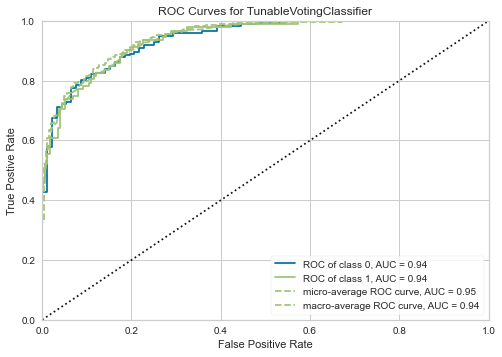

In [80]:
plot_model(blender)

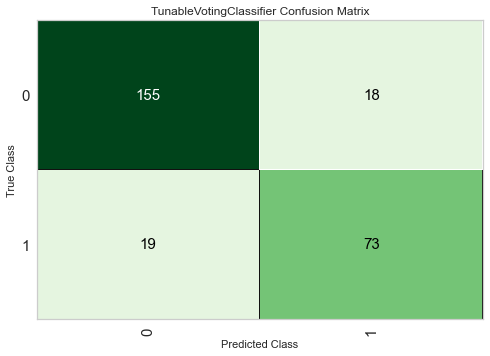

In [81]:
plot_model(blender, plot = 'confusion_matrix')

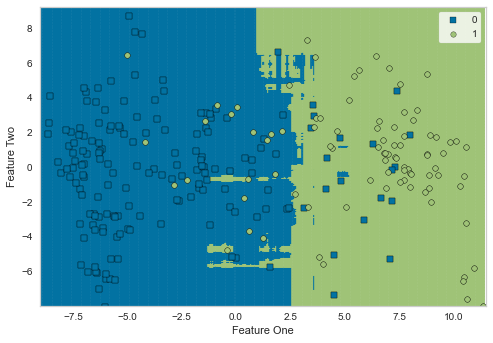

In [82]:
plot_model(blender, plot = 'boundary')

In [83]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Prediction

In [46]:
pred_holdouts_blender = predict_model(blender,data=cineplex_test,probability_threshold=0.65)


In [47]:
pred_holdouts_stacker = predict_model(stacker,data=cineplex_test,probability_threshold=0.65)


In [48]:
pred_holdouts_tuned_et = predict_model(tuned_et,data=cineplex_test,probability_threshold=0.65)


In [49]:
pred_holdouts_tuned_nb = predict_model(tuned_nb,data=cineplex_test,probability_threshold=0.65)

In [50]:
pred_holdouts_tuned_rf = predict_model(tuned_rf,data=cineplex_test,probability_threshold=0.65)

In [51]:
pred_holdouts_tuned_catboost = predict_model(tuned_catboost,data=cineplex_test,probability_threshold=0.65)

In [52]:
pred_holdouts_tuned_xgboost = predict_model(tuned_xgboost,data=cineplex_test,probability_threshold=0.65)

In [53]:
pred_holdouts_tuned_lightgbm = predict_model(tuned_lightgbm,data=cineplex_test,probability_threshold=0.65)

In [54]:
pred_holdouts_boosted_tuned_et = predict_model(boosted_tuned_et,data=cineplex_test,probability_threshold=0.65)

In [55]:
pred_holdouts_boosted_tuned_rf = predict_model(boosted_tuned_rf,data=cineplex_test,probability_threshold=0.65)

In [69]:
pred_holdouts_boosted_tuned_catboost = predict_model(boosted_tuned_catboost,data=cineplex_test,probability_threshold=0.65)

Evaluate prediction

In [57]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_blender.Label.astype(int), average='macro')

0.783068783068783

In [78]:
pred_holdouts_blender.to_csv("D:\\869-Machine Learning & AI\\Team project\\gen_X_test_features_v3_output_cost.csv")

In [58]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_stacker.Label.astype(int), average='macro')

0.7630460649328574

In [59]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_et.Label.astype(int), average='macro')

0.7714379406460075

In [60]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_rf.Label.astype(int), average='macro')

0.7616971810520198

In [61]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_catboost.Label.astype(int), average='macro')

0.7790569503980405

In [62]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_nb.Label.astype(int), average='macro')

0.39033457249070636

In [63]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_lightgbm.Label.astype(int), average='macro')

0.7692091190543202

In [64]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_lightgbm.Label.astype(int), average='macro')

0.7692091190543202

In [65]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_xgboost.Label.astype(int), average='macro')

0.7515151515151516

In [66]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_boosted_tuned_et.Label.astype(int), average='macro')

0.7732813874575845

In [67]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_boosted_tuned_rf.Label.astype(int), average='macro')

0.7548579970104634

In [70]:
from sklearn.metrics import f1_score
f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_boosted_tuned_catboost.Label.astype(int), average='macro')

0.783068783068783

Model performance

In [32]:
from pandas_ml import ConfusionMatrix

print(ConfusionMatrix(pred_holdouts_tuned_catboost.Label.astype(int), cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int)))

AttributeError: module 'sklearn.metrics' has no attribute 'jaccard_similarity_score'

In [40]:
# Plot non-normalized confusion matrix
class_names = "haspopcorn"
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(tuned_catboost, cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_catboost.Label.astype(int),
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:70: Feature Has_US_Is_LrgPopcorn_mean is present in model but not in pool.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred_dt, target_names=class_names))

In [41]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_catboost.Label.astype(int))))
print("Kappa = {:.2f}".format(cohen_kappa_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_catboost.Label.astype(int))))
print("F1 Score = {:.2f}".format(f1_score(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_catboost.Label.astype(int))))
print("Log Loss = {:.2f}".format(log_loss(cineplex_test_pred.Has_US_Is_LrgPopcorn.astype(int), pred_holdouts_tuned_catboost.Label.astype(int))))

Accuracy = 0.77
Kappa = 0.51
F1 Score = 0.68
Log Loss = 7.79


In [45]:
shap_values = tuned_catboost.get_feature_importance(cineplex_train, label="Has_US_Is_LrgPopcorn",cat_features=categorical_features_indices, 
                                                                     type="ShapValues")
shap.summary_plot(shap_values, cineplex_train)

NameError: name 'categorical_features_indices' is not defined

In [46]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
from catboost import *
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import shap
from time import time

ModuleNotFoundError: No module named 'shap'

In [2]:
def get_feature_imp_plot(method):
    
    if method == "Permutation":
        fi =  permutation_importances(tuned_catboost, cineplex_train, Has_US_Is_LrgPopcorn, log_loss)
    
    elif method == "Baseline":
        fi = baseline_importance(model, X_train, y_train, X_test, y_test, log_loss)
    
    elif method == "ShapeValues":
        shap_values = model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features_indices), 
                                                                     type="ShapValues")
        shap_values = shap_values[:,:-1]
        shap.summary_plot(shap_values, X_test) 
        
    else:
        fi = model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features_indices), 
                                                                     type=method)
        
    if method != "ShapeValues":
        feature_score = pd.DataFrame(list(zip(X_test.dtypes.index, fi )),
                                        columns=['Feature','Score'])

        feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

        plt.rcParams["figure.figsize"] = (12,7)
        ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
        ax.set_title("Feature Importance using {}".format(method), fontsize = 14)
        ax.set_xlabel("features")
        plt.show()